<a href="https://colab.research.google.com/github/ruSenmalla/R-Practise/blob/main/Lab3_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
# Importing Libariries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
import wordcloud
nltk.download('punkt')
from nltk.corpus.reader import wordlist
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Function to read text files from a directory
def read_text_files_from_directory(directory):
    documents = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r") as file:
                documents.append(file.read())
    return documents

In [ ]:
# Function to preprocess text (convert to lowercase, tokenize, etc.)
def preprocess_text(text):
    # You can add additional preprocessing steps here if needed
    return text.lower().split()

In [ ]:
# Read text files from a directory
documents = read_text_files_from_directory("/content/drive/MyDrive/Colab Notebooks/The Diamond Sutra ")


In [ ]:
# Preprocess each document
preprocessed_documents = [preprocess_text(doc) for doc in documents]

In [ ]:
# Print contents of each document
for i, document in enumerate(documents):
    print(f"Document {i+1}:\n{document}\n")

Document 1:
VAJRA CHEHEDIKA
PRAJNAPARAMITA
SUTRA
OF
GAUTAMA
THE
BUDDHA
THUS HAVE I HEARD AT ONE TIME.
THE LORD DWELT AT SRAVASTI.
EARLY IN THE MORNING THE LORD DRESSED,
PUT ON HIS CLOAK, TOOK HIS BOWL,
AND ENTERED THE GREAT CITY OF SRAVASTI
TO COLLECT ALMS.
WHEN HE HAD EATEN AND RETURNED
FROM HIS ROUND, THE LORD PUT AWAY
HIS BOWL AND CLOAK, WASHED HIS FEET,
AND SAT DOWN ON THE SEAT ARRANGED FOR HIM,
CROSSING HIS LEGS, HOLDING HIS BODY UPRIGHT, AND
MINDFULLY FIXING HIS ATTENTION IN FRONT OF HIM.
THEN MANY MONKS APPROACHED TO WHERE
THE LORD WAS, SALUTED HIS FEET WITH
THEIR HEADS, THRICE WALKED ROUND HIM
TO THE RIGHT, AND SAT DOWN ON ONE SIDE.
AT THAT TIME THE VENERABLE SUBHUTI
CAME TO THAT ASSEMBLY, AND SAT DOWN.
THEN HE ROSE FROM HIS SEAT,
PUT HIS UPPER ROBE OVER ONE SHOULDER,
PLACED HIS RIGHT KNEE ON THE GROUND,
BENT FORTH HIS FOLDED HANDS TOWARDS
THE LORD, AND SAID TO THE LORD:
'IT IS WONDERFUL, O LORD,
IT IS EXCEEDINGLY WONDERFUL, O WELL-GONE,
HOW MUCH THE BODHISATTVAS,
THE GREAT BEI

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (3, 845)


In [ ]:
# Convert preprocessed documents back to strings
preprocessed_documents_as_strings = [" ".join(doc) for doc in preprocessed_documents]

In [ ]:
# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Print TF-IDF scores for each document
for i, document in enumerate(documents):
    print(f"TF-IDF scores for Document {i+1}:")
    for word, score in zip(feature_names, tfidf_matrix.toarray()[i]):
        print(f"{word}: {score}")
    print()

TF-IDF scores for Document 1:
about: 0.0
abundance: 0.0
accumulated: 0.0
accumulating: 0.0
achieve: 0.0
adolf: 0.0
afraid: 0.0
after: 0.019166128202236992
afternoon: 0.0
again: 0.0
against: 0.0
age: 0.019166128202236992
ages: 0.0
ago: 0.019166128202236992
agree: 0.0
alert: 0.0
all: 0.03395947219880526
allow: 0.0
almost: 0.0
alms: 0.019166128202236992
alone: 0.0
aloneness: 0.0
already: 0.0
also: 0.0
although: 0.019166128202236992
always: 0.0
am: 0.0
an: 0.0
ananda: 0.0
ancient: 0.019166128202236992
and: 0.16979736099402631
anguish: 0.0
another: 0.019166128202236992
antagonism: 0.0
any: 0.01131982406626842
anybody: 0.0
anymore: 0.0
anything: 0.0
anywhere: 0.0
apart: 0.0
approached: 0.019166128202236992
are: 0.01131982406626842
arranged: 0.019166128202236992
art: 0.0
as: 0.03395947219880526
ashes: 0.0
aside: 0.0
asked: 0.0
asks: 0.0
asleep: 0.0
assembly: 0.019166128202236992
at: 0.04527929626507368
attention: 0.019166128202236992
attentively: 0.019166128202236992
audience: 0.0191661282022

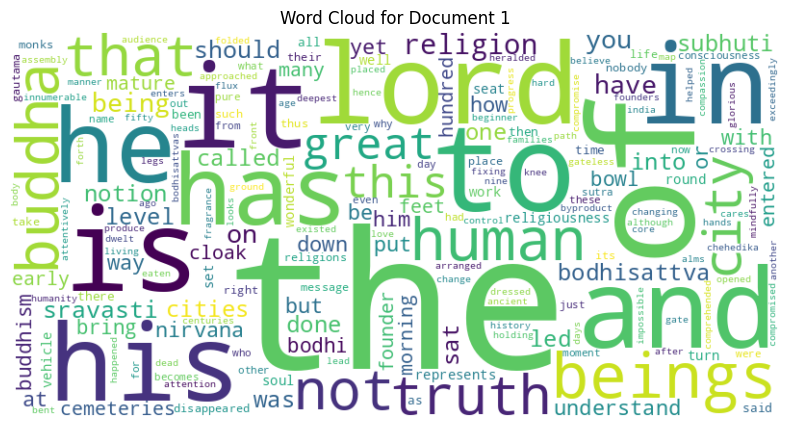

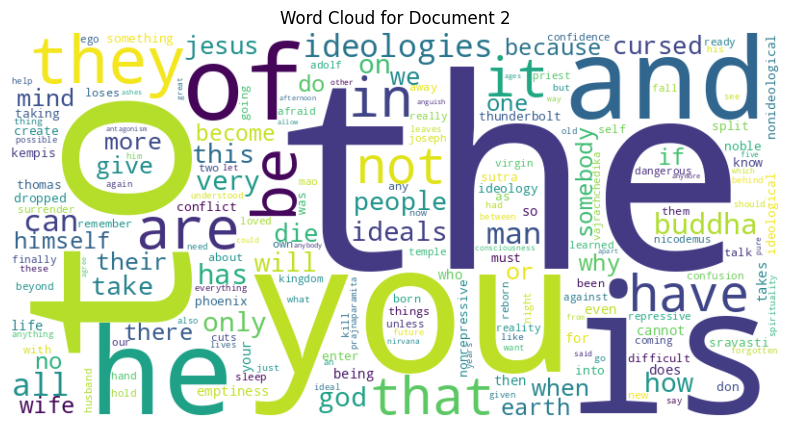

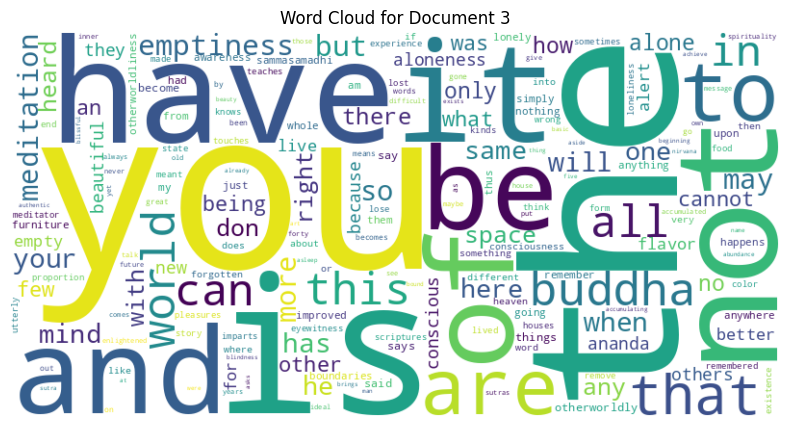

In [ ]:
# Iterate over each document and generate a word cloud
for i, document in enumerate(documents):
    # Get TF-IDF scores for words in the current document
    document_tfidf_scores = {}
    for word, score in zip(feature_names, tfidf_matrix.toarray()[i]):
        document_tfidf_scores[word] = score

    # Generate word cloud using TF-IDF scores as weights
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(document_tfidf_scores)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Document {i+1}")
    plt.axis('off')
    plt.show()